# Importing Libraries and Loading the data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('insurance.csv')

In [5]:
df.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


# Exploratory Data Analysis

In [13]:
# 1. Checking for null values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [12]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [11]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [10]:
df['sex'].value_counts(dropna=False)

male      676
female    662
Name: sex, dtype: int64

In [14]:
df['smoker'].value_counts(dropna=False)

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
df['region'].value_counts(dropna=False)

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

# Numerical Variable

<AxesSubplot:xlabel='age', ylabel='Count'>

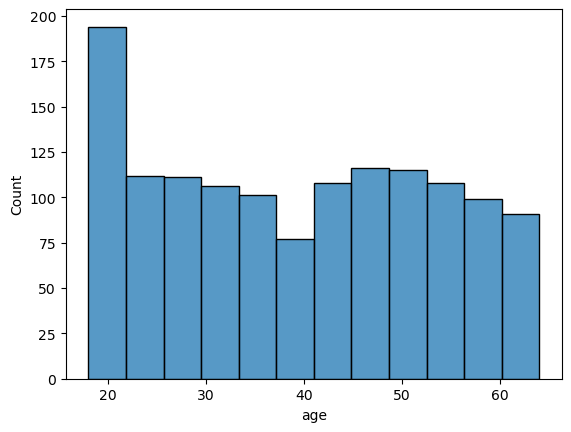

In [16]:
sns.histplot(df['age'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

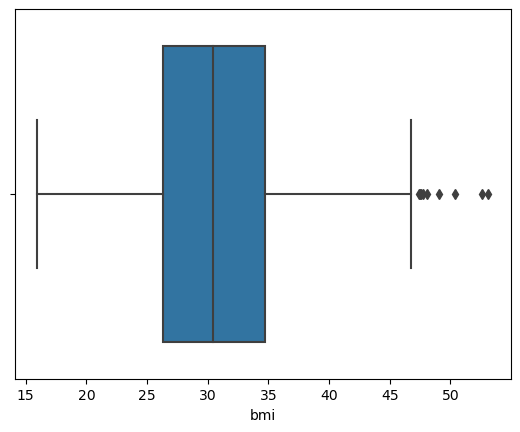

In [17]:
sns.boxplot(df['bmi'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

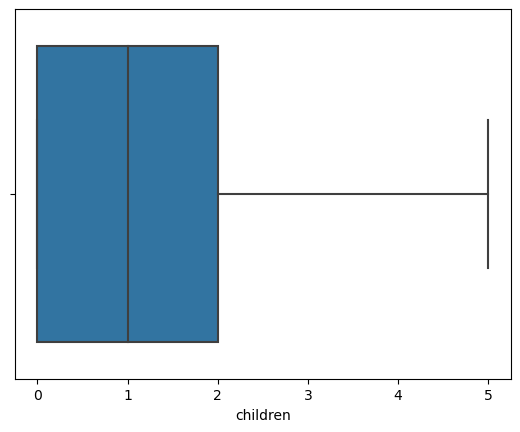

In [18]:
sns.boxplot(df['children'])

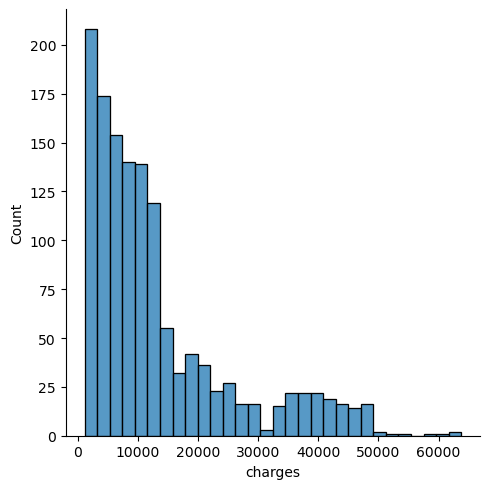

In [19]:
sns.displot(df['charges'])

# Categorical Variables

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

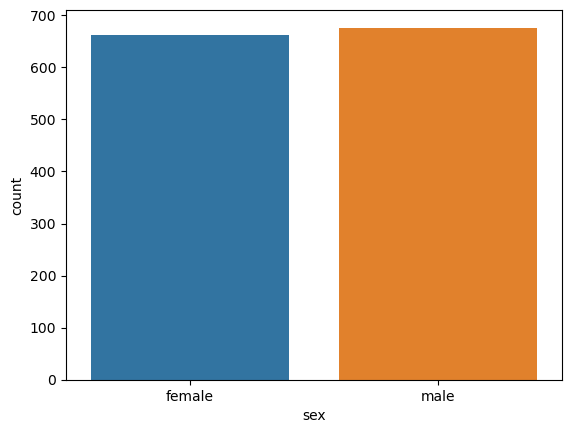

In [20]:
sns.countplot(df['sex'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='region', ylabel='count'>

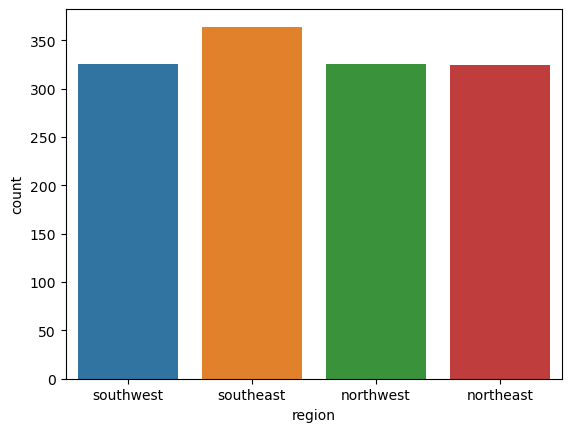

In [21]:
sns.countplot(df['region'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='smoker', ylabel='count'>

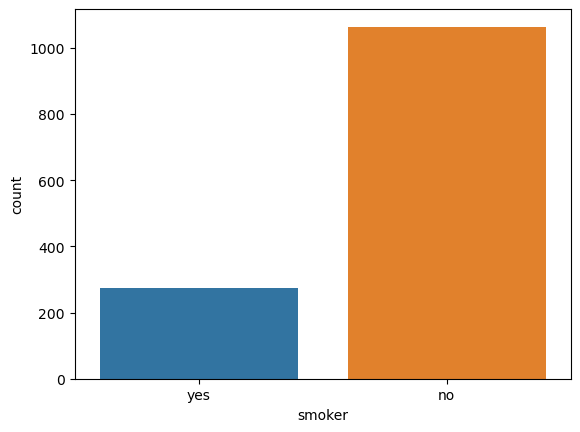

In [22]:
sns.countplot(df['smoker'])

<AxesSubplot:xlabel='smoker', ylabel='charges'>

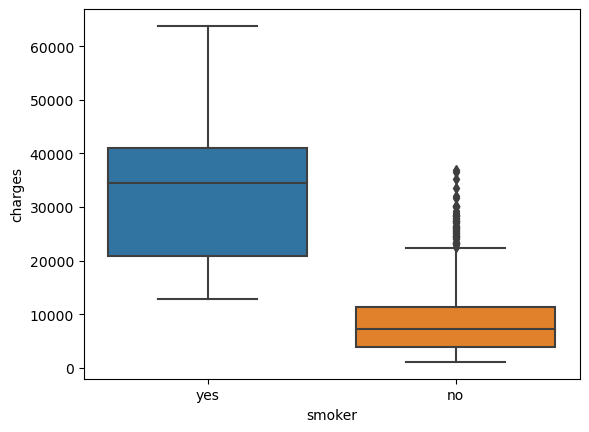

In [23]:
sns.boxplot(x=df['smoker'],y=df['charges'])

<AxesSubplot:xlabel='charges', ylabel='bmi'>

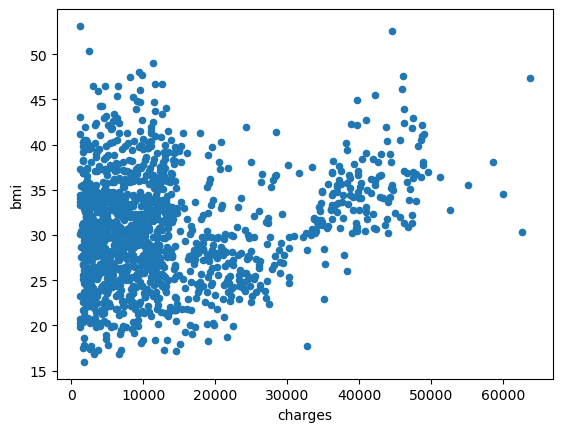

In [24]:
df.plot.scatter(x = 'charges',y = 'bmi')

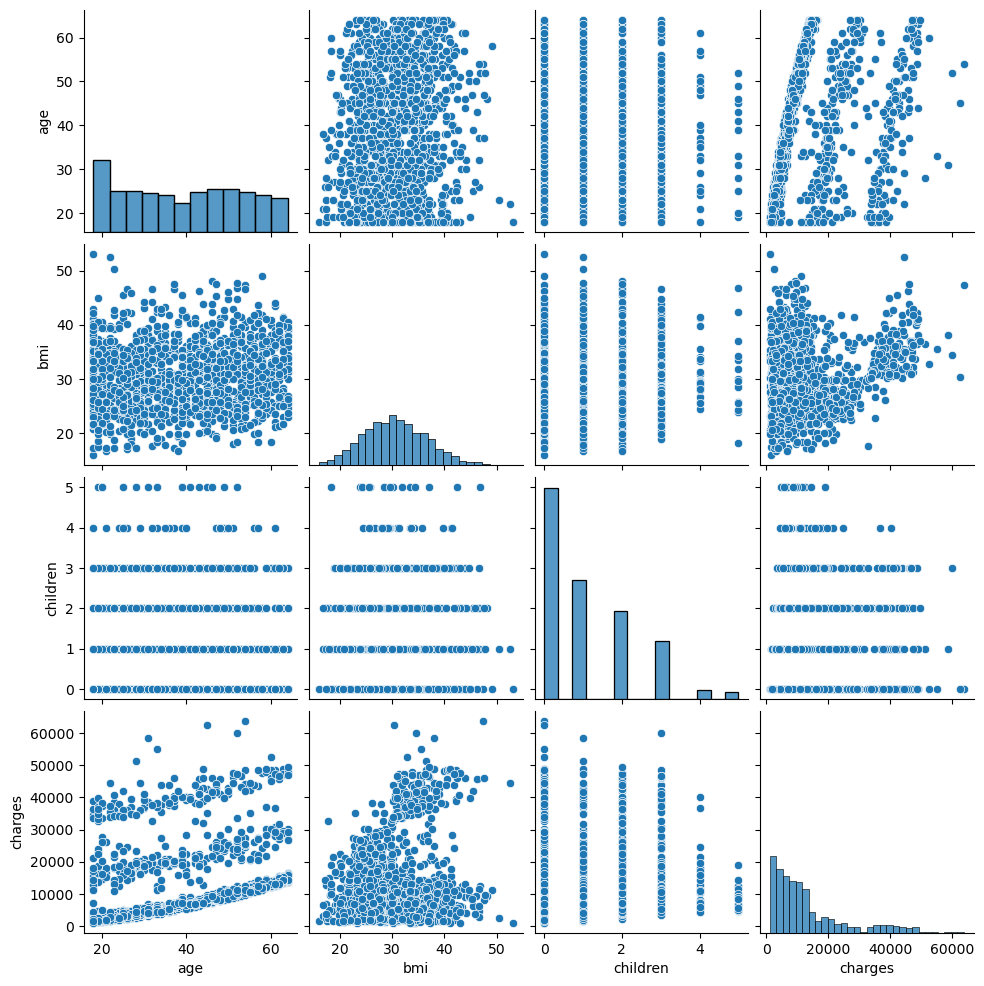

In [25]:
sns.pairplot(df)

<AxesSubplot:>

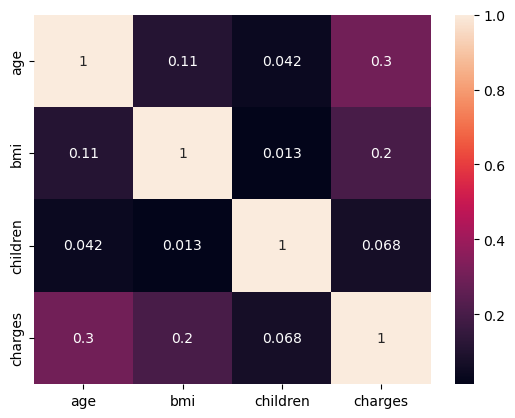

In [26]:
sns.heatmap(df.corr(),annot=True)

Identifying the Task
#1. The input Variables are: age, sex, bmi, children, smoker, region

#2. Output variable is: charges

#3. Target variable : Yes (charges)

#4. Type of ML : Supervised Machine Learning

#5. Task of ML : Regression

#6. Evaluation Metric : Mean Absolute Error


# Choosing X and y

In [28]:
y=df['charges']
X=df[['age','sex','bmi','children','smoker','region']]

In [29]:
X_cat=X.select_dtypes(include=['object'])
X_cat

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [30]:
X_num=X.select_dtypes(include=['int64', 'float64'])
X_num

,age,bmi,children
0,19,27.900,0
1,18,33.770,1
2,28,33.000,3
3,33,22.705,0
4,32,28.880,0
...,...,...,...
1333,50,30.970,3
1334,18,31.920,0
1335,18,36.850,0
1336,21,25.800,0


# Label Encoding

In [31]:
from sklearn.preprocessing import OneHotEncoder
encoder= OneHotEncoder(sparse= False)
from sklearn.preprocessing import LabelEncoder
encoder_l= LabelEncoder()

In [32]:
region_encoder={'southeast':1, 'northeast':2, 'southwest':3, 'northwest':4}
X_cat_le=X_cat['region'].apply(lambda x : region_encoder[x])
X_cat_le.head()

0    3
1    1
2    1
3    4
4    4
Name: region, dtype: int64

# One Hot Encoding

In [33]:
X_cat_ohe=pd.DataFrame(encoder.fit_transform(X_cat[['sex', 'smoker']]), columns = ['female','male', 'smoker_y','smoker_n'])
X_cat_ohe

,female,male,smoker_y,smoker_n
0,1.0,0.0,0.0,1.0
1,0.0,1.0,1.0,0.0
2,0.0,1.0,1.0,0.0
3,0.0,1.0,1.0,0.0
4,0.0,1.0,1.0,0.0
...,...,...,...,...
1333,0.0,1.0,1.0,0.0
1334,1.0,0.0,1.0,0.0
1335,1.0,0.0,1.0,0.0
1336,1.0,0.0,1.0,0.0


In [34]:
X_cat_t= pd.concat([X_cat_ohe,X_cat_le], axis=1)
X_cat_t

,female,male,smoker_y,smoker_n,region
0,1.0,0.0,0.0,1.0,3
1,0.0,1.0,1.0,0.0,1
2,0.0,1.0,1.0,0.0,1
3,0.0,1.0,1.0,0.0,4
4,0.0,1.0,1.0,0.0,4
...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,4
1334,1.0,0.0,1.0,0.0,2
1335,1.0,0.0,1.0,0.0,1
1336,1.0,0.0,1.0,0.0,3


In [35]:
X_df=pd.concat([X_cat_t,X_num], axis=1)

In [36]:
X_df

,female,male,smoker_y,smoker_n,region,age,bmi,children
0,1.0,0.0,0.0,1.0,3,19,27.900,0
1,0.0,1.0,1.0,0.0,1,18,33.770,1
2,0.0,1.0,1.0,0.0,1,28,33.000,3
3,0.0,1.0,1.0,0.0,4,33,22.705,0
4,0.0,1.0,1.0,0.0,4,32,28.880,0
...,...,...,...,...,...,...,...,...
1333,0.0,1.0,1.0,0.0,4,50,30.970,3
1334,1.0,0.0,1.0,0.0,2,18,31.920,0
1335,1.0,0.0,1.0,0.0,1,18,36.850,0
1336,1.0,0.0,1.0,0.0,3,21,25.800,0


# Train Test Split

In [37]:
from sklearn.model_selection import train_test_split as split

X_train,X_test,y_train,y_test=split(X_df,y,test_size=0.25,random_state=0)

In [38]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(1003, 8) (1003,)
(335, 8) (335,)


# Standardization

In [40]:
# Standardizing the Numerical data
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler() # initialising the standard scaler object

In [41]:
X_train_r=pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns,index=X_train.index)
X_train_r

,female,male,smoker_y,smoker_n,region,age,bmi,children
1075,0.985155,-0.985155,0.503736,-0.503736,-1.293527,-0.514853,-0.181331,-0.063607
131,0.985155,-0.985155,0.503736,-0.503736,-0.407320,1.548746,-1.393130,-0.892144
15,-1.015069,1.015069,0.503736,-0.503736,0.478888,-1.439915,-0.982242,-0.063607
1223,0.985155,-0.985155,-1.985167,1.985167,-1.293527,-1.368757,-1.011133,-0.892144
1137,0.985155,-0.985155,0.503736,-0.503736,1.365096,-0.941805,-1.362635,-0.892144
...,...,...,...,...,...,...,...,...
763,-1.015069,1.015069,0.503736,-0.503736,-0.407320,-0.870646,-0.752723,-0.892144
835,-1.015069,1.015069,0.503736,-0.503736,-1.293527,0.196733,0.842680,0.764931
1216,-1.015069,1.015069,0.503736,-0.503736,-1.293527,0.054415,-0.905201,-0.892144
559,-1.015069,1.015069,0.503736,-0.503736,1.365096,-1.439915,0.772058,-0.892144


In [42]:
X_test_r=pd.DataFrame(scaler.transform(X_test), columns=X_test.columns,index=X_test.index)
X_test_r

,female,male,smoker_y,smoker_n,region,age,bmi,children
578,-1.015069,1.015069,0.503736,-0.503736,0.478888,0.908319,-0.083424,-0.063607
610,0.985155,-0.985155,0.503736,-0.503736,-1.293527,0.552526,-0.216642,-0.063607
569,-1.015069,1.015069,-1.985167,1.985167,1.365096,0.623684,1.580192,0.764931
1034,-1.015069,1.015069,0.503736,-0.503736,1.365096,1.548746,1.229492,-0.892144
198,0.985155,-0.985155,0.503736,-0.503736,1.365096,0.837160,-2.033538,-0.892144
...,...,...,...,...,...,...,...,...
574,0.985155,-0.985155,0.503736,-0.503736,-0.407320,1.264112,0.573837,0.764931
1174,-1.015069,1.015069,0.503736,-0.503736,1.365096,-0.728329,0.223137,0.764931
1327,-1.015069,1.015069,0.503736,-0.503736,-1.293527,0.837160,-0.110710,-0.063607
817,-1.015069,1.015069,0.503736,-0.503736,0.478888,-1.155281,1.024048,1.593468


# Model Building

In [43]:
# KNN
from sklearn.neighbors import KNeighborsRegressor
knn_regressor= KNeighborsRegressor()
knn_regressor.fit(X_train_r,y_train)

KNeighborsRegressor()

In [44]:
# Decision Tree
from sklearn.tree import DecisionTreeRegressor
dt_regressor= DecisionTreeRegressor()
dt_regressor.fit(X_train_r,y_train)

DecisionTreeRegressor()

In [45]:
# Linear Regression
from sklearn.linear_model import LinearRegression
lr_regressor= LinearRegression()
lr_regressor.fit(X_train_r,y_train)

LinearRegression()

In [46]:
# Random Forest Regression
from sklearn.ensemble import RandomForestRegressor
rf_regressor= RandomForestRegressor()
rf_regressor.fit(X_train_r,y_train)

RandomForestRegressor()

In [47]:
# Support Vector Regression
from sklearn.svm import SVR
svr_regressor= SVR()
svr_regressor.fit(X_train_r,y_train)

SVR()

# Evaluation

In [48]:
# KNN
y_test_pred_knn=knn_regressor.predict(X_test_r)

In [49]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted': y_test_pred_knn})
temp_df.head()

,Actual,Predicted
578,9724.53000,8433.604400
610,8547.69130,7948.160220
569,45702.02235,44996.814234
1034,12950.07120,13296.908850
198,9644.25250,10469.295440


<AxesSubplot:xlabel='charges', ylabel='Count'>

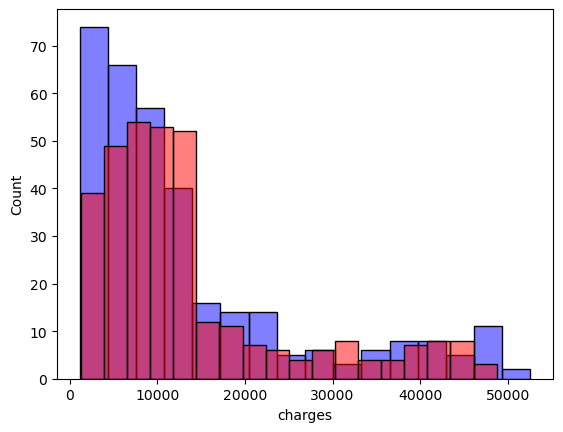

In [50]:
sns.histplot(y_test,color='blue', alpha=0.5)
sns.histplot(y_test_pred_knn, color='red',alpha=0.5)

In [51]:
from sklearn import metrics
mae_knn=metrics.mean_absolute_error(y_test,y_test_pred_knn)
print('Mean absolute error:', mae_knn)

Mean absolute error: 3135.389914092537


In [52]:
# Decision Tree
y_test_pred_dt=dt_regressor.predict(X_test_r)

In [53]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted': y_test_pred_dt})
temp_df.head()

,Actual,Predicted
578,9724.53000,10085.84600
610,8547.69130,8233.09750
569,45702.02235,44202.65360
1034,12950.07120,13143.86485
198,9644.25250,9264.79700


<AxesSubplot:xlabel='charges', ylabel='Count'>

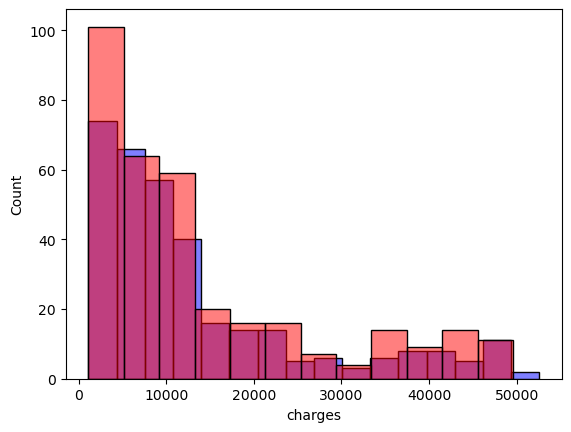

In [54]:
sns.histplot(y_test,color='blue', alpha=0.5)
sns.histplot(y_test_pred_dt, color='red',alpha=0.5)

In [55]:
from sklearn import metrics
mae_dt=metrics.mean_absolute_error(y_test,y_test_pred_dt)
print('Mean absolute error:', mae_dt)

Mean absolute error: 3108.710145519403


In [56]:
#Linear Regression
y_test_pred =lr_regressor.predict(X_test_r)

In [57]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted': y_test_pred})
temp_df.head()

,Actual,Predicted
578,9724.53000,11541.153404
610,8547.69130,9646.687770
569,45702.02235,38144.652747
1034,12950.07120,16177.749870
198,9644.25250,7099.489327


<AxesSubplot:xlabel='charges', ylabel='Count'>

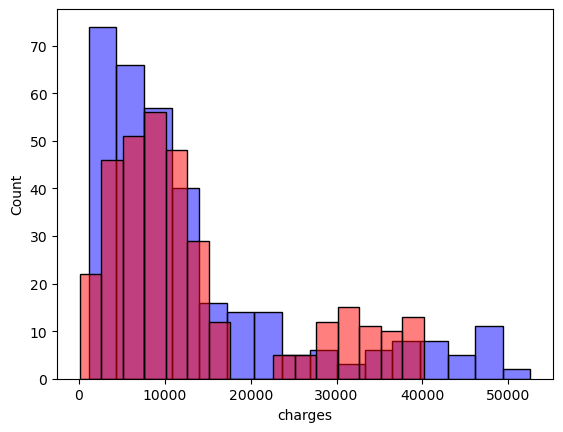

In [58]:
sns.histplot(y_test,color='blue', alpha=0.5)
sns.histplot(y_test_pred, color='red',alpha=0.5)

In [59]:
from sklearn import metrics
mae_lr= metrics.mean_absolute_error(y_test,y_test_pred)
print('Mean absolute error:', mae_lr)

Mean absolute error: 4005.8869991148476


In [60]:
#Random Forest Regression
y_test_pred_rf=rf_regressor.predict(X_test_r)

In [61]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted': y_test_pred_rf})
temp_df.head()

,Actual,Predicted
578,9724.53000,10410.569002
610,8547.69130,11282.198629
569,45702.02235,45852.548766
1034,12950.07120,13318.182007
198,9644.25250,9378.670184


<AxesSubplot:xlabel='charges', ylabel='Count'>

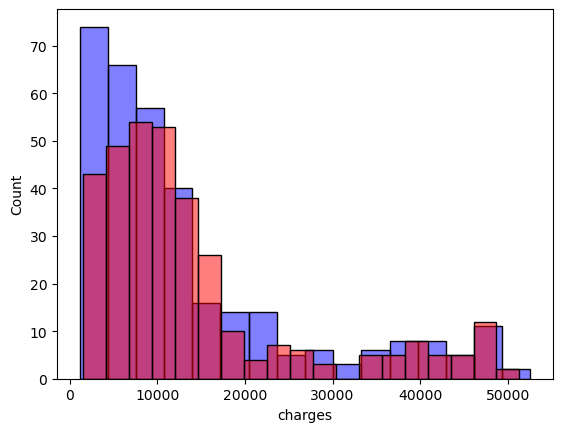

In [62]:
sns.histplot(y_test,color='blue', alpha=0.5)
sns.histplot(y_test_pred_rf, color='red',alpha=0.5)

In [63]:
from sklearn import metrics
mae_rf=metrics.mean_absolute_error(y_test,y_test_pred_rf)
print('Mean absolute error:', mae_rf)

Mean absolute error: 2646.396868162462


In [64]:
# SVR
y_test_pred_svr=svr_regressor.predict(X_test_r)

In [65]:
temp_df=pd.DataFrame({'Actual':y_test,'Predicted': y_test_pred_svr})
temp_df.head()

,Actual,Predicted
578,9724.53000,9483.906672
610,8547.69130,9465.723536
569,45702.02235,9558.491635
1034,12950.07120,9521.536364
198,9644.25250,9487.160704


<AxesSubplot:xlabel='charges', ylabel='Count'>

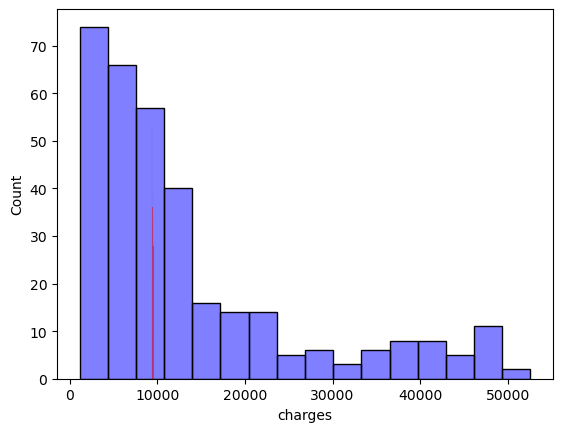

In [66]:
sns.histplot(y_test,color='blue', alpha=0.5)
sns.histplot(y_test_pred_svr, color='red',alpha=0.5)

In [67]:
from sklearn import metrics
mae_svr= metrics.mean_absolute_error(y_test,y_test_pred_svr)
print('Mean absolute error:', mae_svr )

Mean absolute error: 8535.8320996878


In [68]:
score= {'Algorithms':['KNN','Desision tree','Linear Regression','Random Forest Regression','Support Vector Regression'],
           'Scores':[mae_knn, mae_dt, mae_lr,mae_rf,mae_svr]}
score_df= pd.DataFrame(score)
score_df

,Algorithms,Scores
0,KNN,3135.389914
1,Desision tree,3108.710146
2,Linear Regression,4005.886999
3,Random Forest Regression,2646.396868
4,Support Vector Regression,8535.832100


<AxesSubplot:xlabel='Scores', ylabel='Algorithms'>

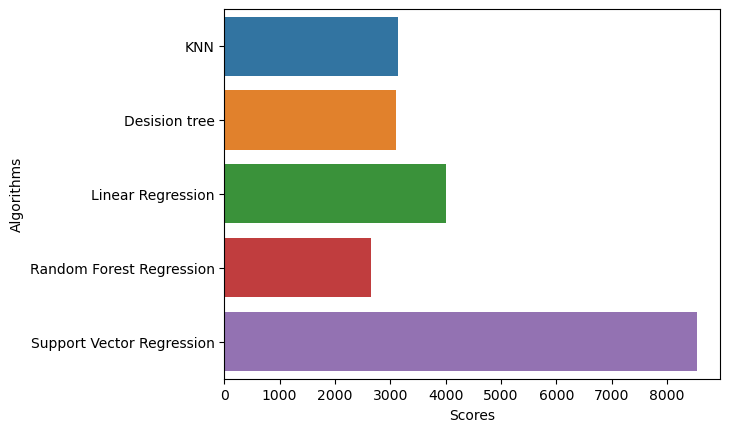

In [69]:
sns.barplot(data=score_df,x=score_df['Scores'],y=score_df['Algorithms'],)

In [ ]:
Support vector Algorithm gives 85% Accuracy. This is good fit